# 0: Presentación

## Nombre del Alumno:
David Casillas Rios

## Certificación:
G32-Ciencia de Datos e IA con Python

## Caso:
Prevención de infartos en asegurados

## Descripción:
En los enfermos con síndrome coronario agudo atendidos en hospitales la predicción de la muerte y/o infarto de miocardio no fatal en los 6 meses puede realizarse con variables sencillas

Un buen diseño de modelo Machine Learning puede ayudar al paciente con alto riesgo de sufrir un infarto a prevenir tal suceso. Desde un punto de vista empresarial de una empresa de seguros es importante porque previene altos gastos como puede ser: Costos en cuidados intensivos, pago de prima por sufrimiento de infarto entre otros gatos.


Para lograr esta labor se ha revisado 4 años de otorgación histórica de salud de los clientes asegurados.


## Archivo de datos requerido:
2_DS_train_enf_corazon.csv

# 1: Declaración de Librerias

In [ ]:
#Manipulación y procesamiento de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

#Técnicas estadísticas
import statsmodels.api as sm

#Modelos analítcos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.cluster import KMeans

#import pandas_profiling as pp
import warnings
import os
warnings.filterwarnings('ignore')
%matplotlib inline

# 2: Carga de Datos

In [ ]:
df = pd.read_csv(r"2_DS_train_enf_corazon.csv", sep=';', encoding='utf-8')
df.head(20)

,ID,Genero,Edad,Flag_hipertension,Flag_problem_cardiaco,Estados_civil,Tipo_trabajo,Zona_residencia,Promedio_nivel_glucosa,IMC,Flag_fumador,Ataque_cardiaco
0,30669,Hombre,3.0,0,0,No,cuidar_ninos,Rural,95.12,18.0,NaN,0
1,30468,Hombre,58.0,1,0,Si,Empresa_privada,Urbano,87.96,39.2,Nunca_fuma,0
2,16523,Mujer,8.0,0,0,No,Empresa_privada,Urbano,110.89,17.6,NaN,0
3,56543,Mujer,70.0,0,0,Si,Empresa_privada,Rural,69.04,35.9,antes_fumaba,0
4,46136,Hombre,14.0,0,0,No,Nunca_trabajo,Rural,161.28,19.1,NaN,0
5,32257,Mujer,47.0,0,0,Si,Empresa_privada,Urbano,210.95,50.1,NaN,0
6,52800,Mujer,52.0,0,0,Si,Empresa_privada,Urbano,77.59,17.7,antes_fumaba,0
7,41413,Mujer,75.0,0,1,Si,Emprendedor,Rural,243.53,27.0,Nunca_fuma,0
8,15266,Mujer,32.0,0,0,Si,Empresa_privada,Rural,77.67,32.3,fumador,0
9,28674,Mujer,74.0,1,0,Si,Emprendedor,Urbano,205.84,54.6,Nunca_fuma,0


Nuestra variable target es Ataque_cardiaco

## 2.1. Diccionario de datos
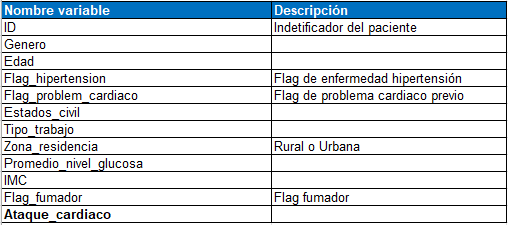

# 3. Manipulacion de Datos

In [ ]:
df.shape

(43400, 12)

In [ ]:
df.columns

Index(['ID', 'Genero', 'Edad', 'Flag_hipertension', 'Flag_problem_cardiaco',
       'Estados_civil', 'Tipo_trabajo', 'Zona_residencia',
       'Promedio_nivel_glucosa', 'IMC', 'Flag_fumador', 'Ataque_cardiaco'],
      dtype='object')

## 3.1: Eliminacion de columnas innecesarias

In [ ]:
#Eliminamos la variable ID ya es una variable autoincrementable que no agrega valor al analisis
df.drop(['ID'], axis=1, inplace=True)

# 4. Entendimiento de los Datos

## 4.1. Variables Cuantitativas:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Genero                  43400 non-null  object 
 1   Edad                    43400 non-null  float64
 2   Flag_hipertension       43400 non-null  int64  
 3   Flag_problem_cardiaco   43400 non-null  int64  
 4   Estados_civil           43400 non-null  object 
 5   Tipo_trabajo            43400 non-null  object 
 6   Zona_residencia         43400 non-null  object 
 7   Promedio_nivel_glucosa  43400 non-null  float64
 8   IMC                     41938 non-null  float64
 9   Flag_fumador            30108 non-null  object 
 10  Ataque_cardiaco         43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


### 4.1.1. Revision de Nulos

In [ ]:
df.isna().sum()

,0
Genero,0
Edad,0
Flag_hipertension,0
Flag_problem_cardiaco,0
Estados_civil,0
Tipo_trabajo,0
Zona_residencia,0
Promedio_nivel_glucosa,0
IMC,1462
Flag_fumador,13292


In [ ]:
# importar liberia en modo local
#!pip install missingno
# liberia para analizar los valores nulos
import missingno as msno

<Axes: >

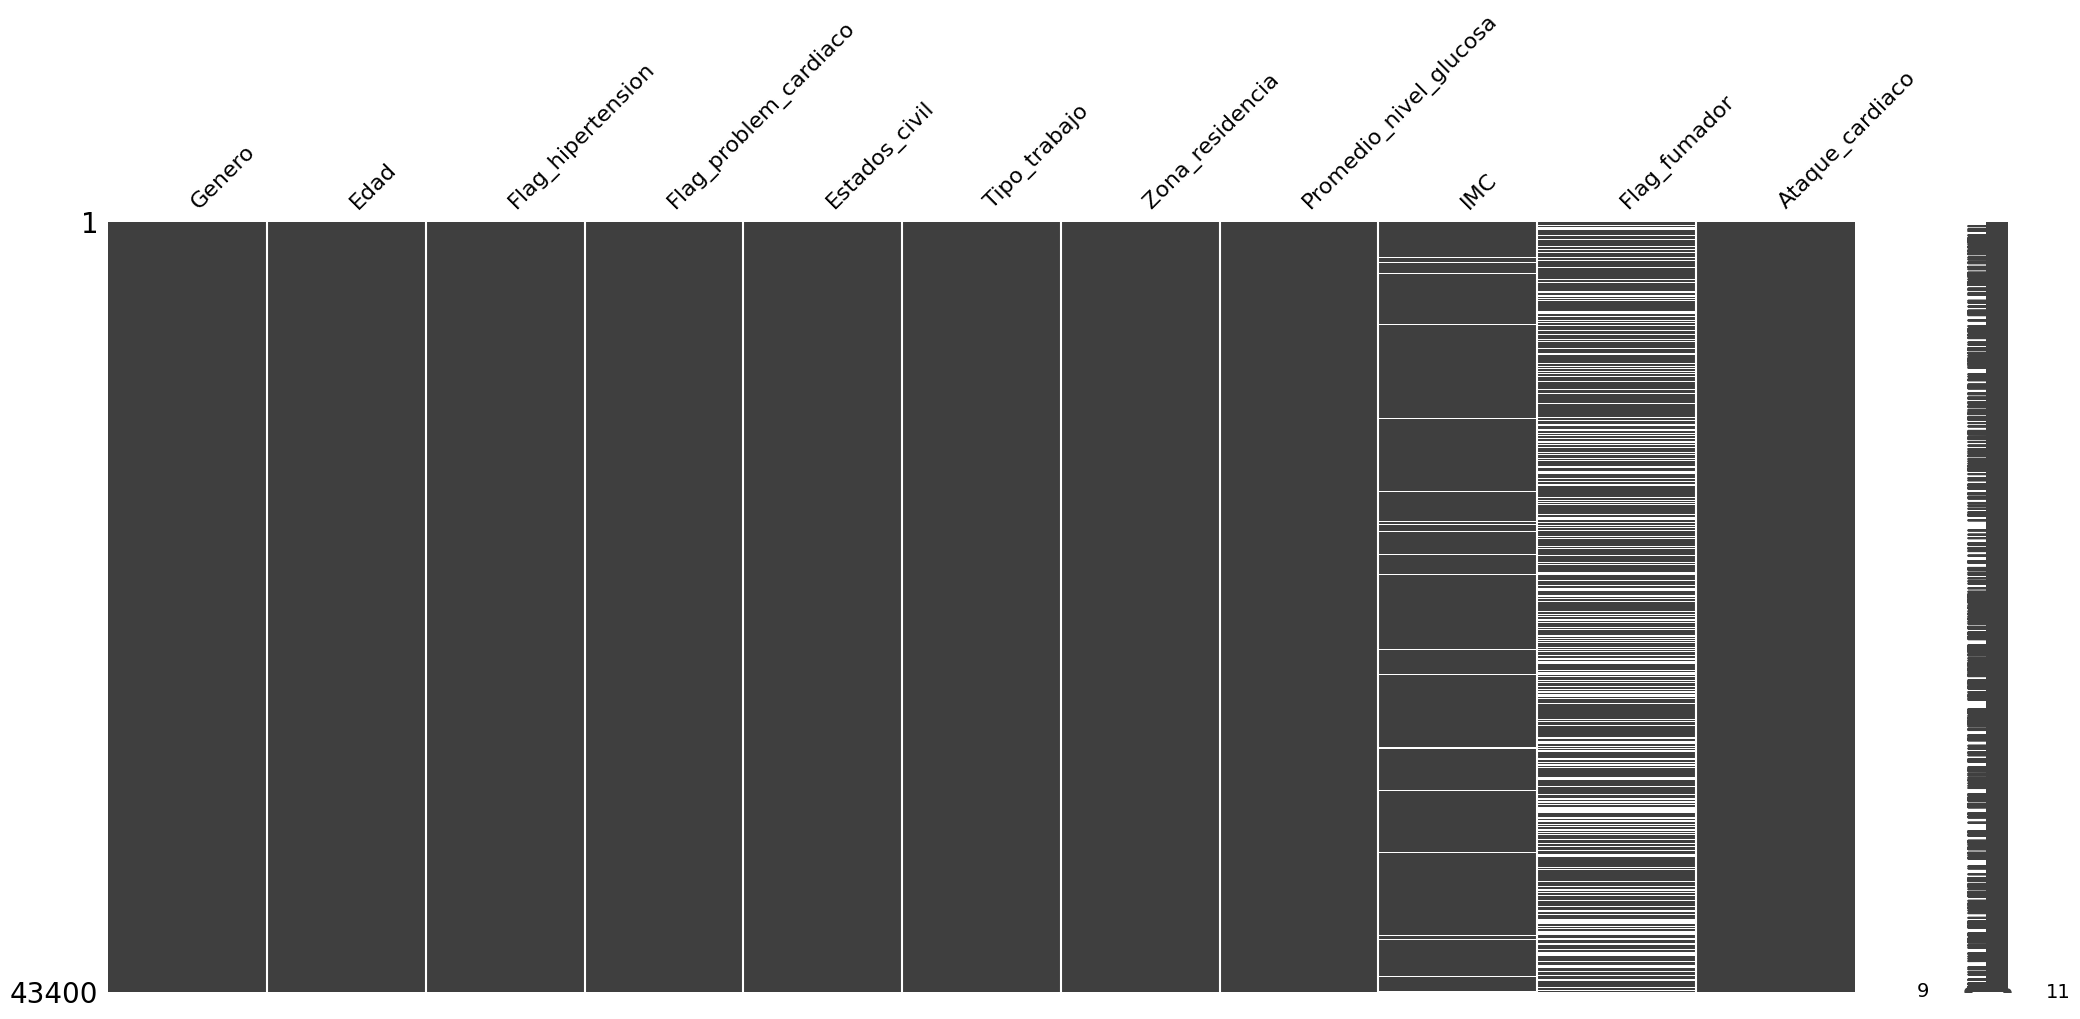

In [ ]:
#Analizamos los valores nulos de Age y Embark
msno.matrix(df)

In [ ]:
print(f"La cantidad de datos nulos en Flag_fumador es del: {df['Flag_fumador'].isna().sum()/df.shape[0]:.0%}")

La cantidad de datos nulos en Flag_fumador es del: 31%


In [ ]:
print(f"La cantidad de datos nulos en IMC es del: {df['IMC'].isna().sum()/df.shape[0]:.0%}")

La cantidad de datos nulos en IMC es del: 3%


Insight 1: Las columnas Flag_Fumador e IMC contienen una alta cantidad de nulos. En este caso, se decidio imputar los datos en la columna Flag_fumador por el valor "sin_datos" para conservar ese 31% de datos, mientras que el 3% de datos nulos de IMC seran imputados.

In [ ]:
df['Flag_fumador'] = df['Flag_fumador'].fillna("sin_datos")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Genero                  43400 non-null  object 
 1   Edad                    43400 non-null  float64
 2   Flag_hipertension       43400 non-null  int64  
 3   Flag_problem_cardiaco   43400 non-null  int64  
 4   Estados_civil           43400 non-null  object 
 5   Tipo_trabajo            43400 non-null  object 
 6   Zona_residencia         43400 non-null  object 
 7   Promedio_nivel_glucosa  43400 non-null  float64
 8   IMC                     41938 non-null  float64
 9   Flag_fumador            43400 non-null  object 
 10  Ataque_cardiaco         43400 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


## 4.1.2: Medidas Estadisticas

In [ ]:
#Calculamos las principales medidas estadísticas
df.describe()

,Edad,Flag_hipertension,Flag_problem_cardiaco,Promedio_nivel_glucosa,IMC,Ataque_cardiaco
count,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000




1.   Insigth 1: La desviacion estandar del campo Edad es menor al promedio. Por ende, hay una baja dispersion de datos.
2.   Insigth 2: La desviacion estandar del campo Promedio_nivel_glucosa es menor al promedio. Por ende, hay una baja dispersion de datos.
3.   Insigth 3: La desviacion estandar del campo IMC es menor al promedio. Por ende, hay una baja dispersion de datos.
4.   Insigth 4: El valor minimo de edad marca de 0.08, lo cual parece ser un valor invalido.
5.   Insigth 5: las columnas Flag_hipertension, Flag_problem_cardiaco y Ataque_cardiaco parecen ser banderas de 0 o 1

In [ ]:
Variables = ['Edad', 'Promedio_nivel_glucosa', 'IMC','Ataque_cardiaco']

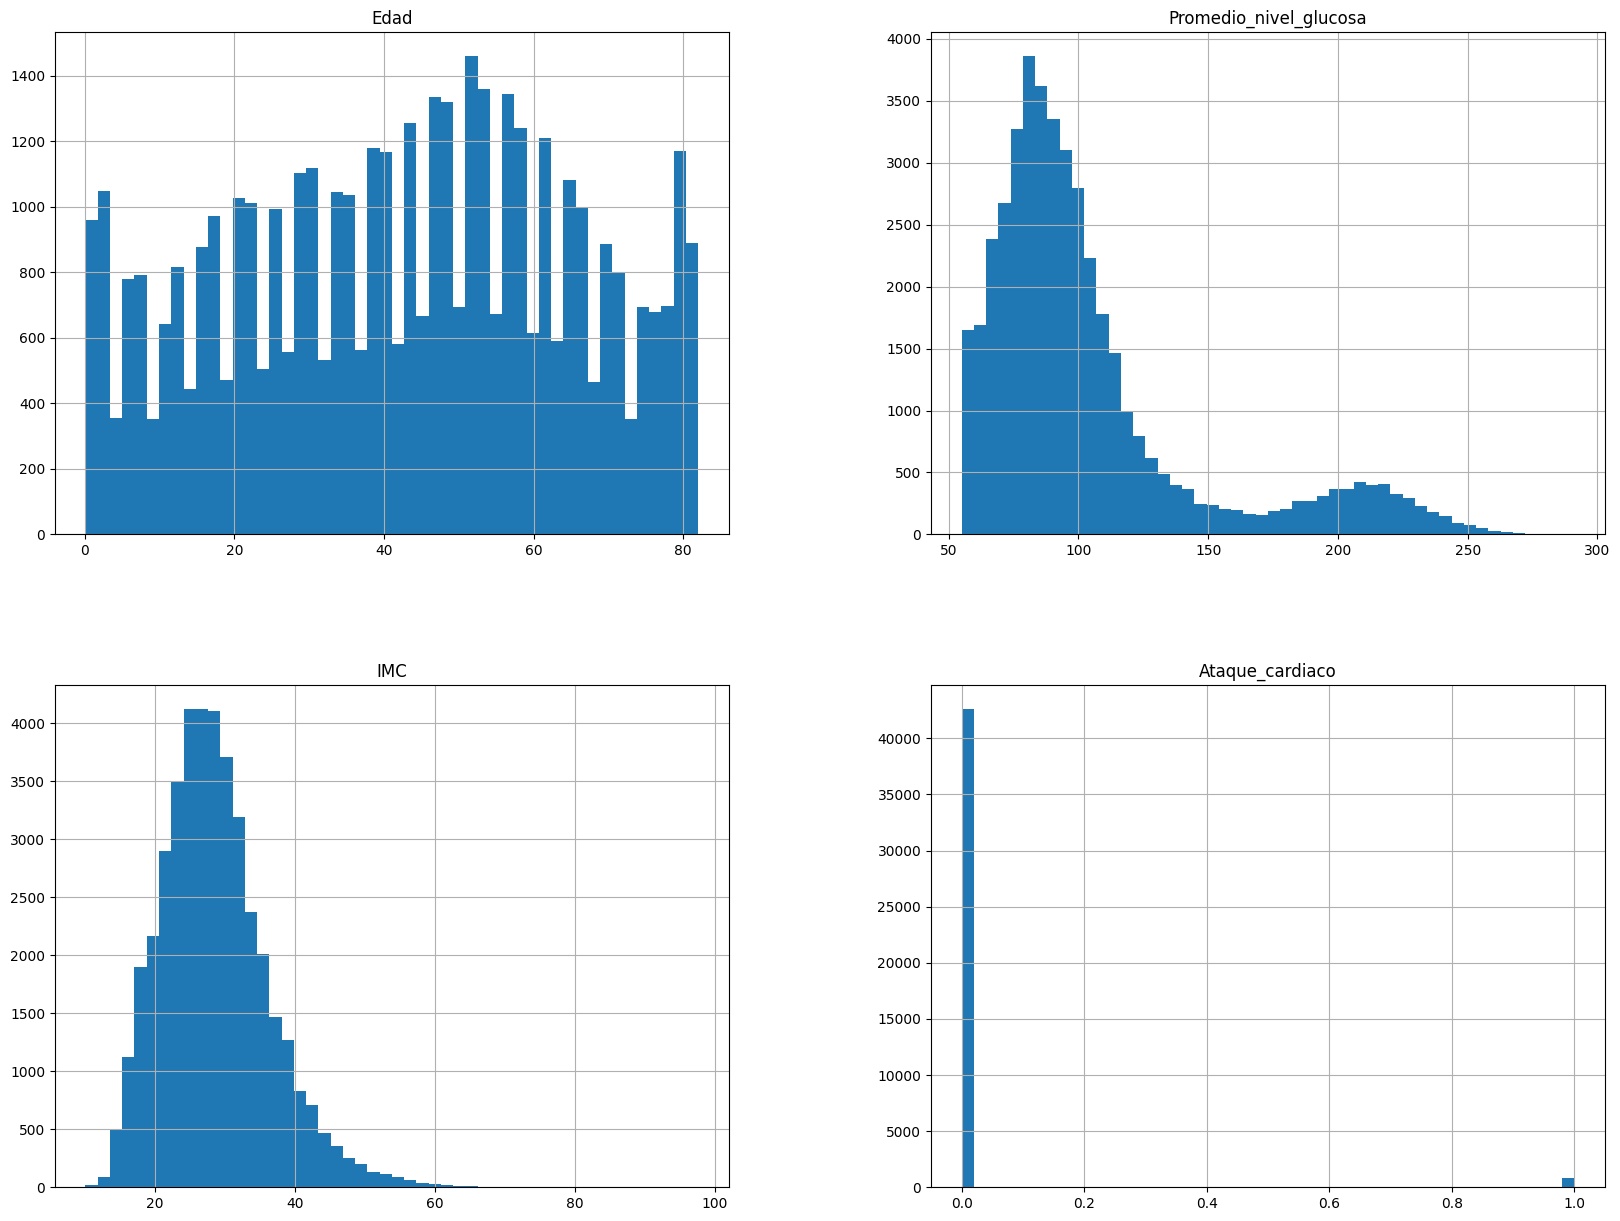

In [ ]:
#Calculamos la distribción de las variables numéricas
df[Variables].hist(bins = 50, figsize=(20,15))
plt.show()

<Axes: >

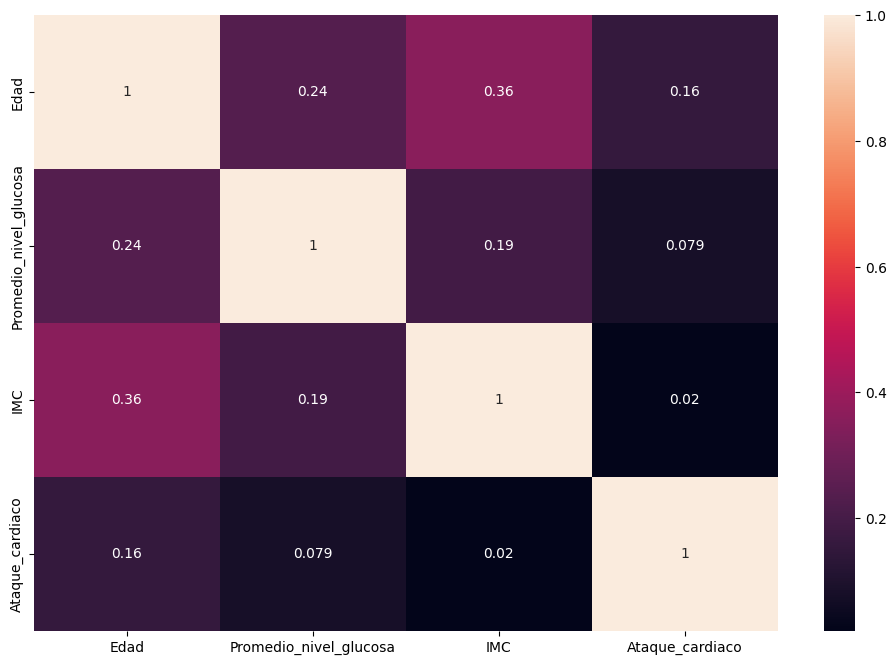

In [ ]:
#Calculamos la correlación variables numéricas
corr = df[Variables].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

1. Insight 6: las variables mas correlacionadas con nuetsra variable target son (en orden): Edad, Promedio_nivel_glucosa e IMC de forma positiva.
2. Insigth 7: No hay una alta correlacion entre las variables y nuetsra variable target
Insigt 8: Hay una alta correlacion entre Edad e IMC de forma positiva.

## 4.2. Variables categoricas

In [ ]:
categorical_attributes = df.select_dtypes(include=['object'])
categorical_attributes.dtypes

,0
Genero,object
Estados_civil,object
Tipo_trabajo,object
Zona_residencia,object
Flag_fumador,object


In [ ]:
df[['Genero','Ataque_cardiaco']].groupby('Genero').agg(['count','sum','mean'])

Ataque_cardiaco               
                 count  sum      mean
Genero                               
Hombre           17724  352  0.019860
Mujer            25665  431  0.016793
Other               11    0  0.000000

1. Insight 8: del 59.1% de mujeres, el 1.9% ha sufrido ataques cardiacos.
2. Insight 9: del 40.8% de mujeres, el 1.6% ha sufrido ataques cardiacos.
3. Insight 10: del 0.1% de otros generos, nadie ha sufrido ataques cardiacos.

In [ ]:
df[['Estados_civil','Ataque_cardiaco']].groupby('Estados_civil').agg(['count','sum','mean'])

Ataque_cardiaco               
                        count  sum      mean
Estados_civil                               
No                      15462   80  0.005174
Si                      27938  703  0.025163

1. Insight 11: del 63.8% de las personas casadas, el 2.15% ha sufrido ataques cardiacos.
2. Insight 12: del 36.2% de las personas solteras, el 0.44% ha sufrido ataques cardiacos.
3. Insight 13: Hay mas casos de ataques cardiacos en matrimonios.

In [ ]:
df[['Tipo_trabajo','Ataque_cardiaco']].groupby('Tipo_trabajo').agg(['count','sum','mean'])

Ataque_cardiaco               
                          count  sum      mean
Tipo_trabajo                                  
Emprendedor                6793  251  0.036950
Empresa_privada           24834  441  0.017758
En_gobierno                5440   89  0.016360
Nunca_trabajo               177    0  0.000000
cuidar_ninos               6156    2  0.000325

1. Insight 12: del 57.2% de personas que trabjan en empresas privadas, el 1.49% ha sufrido ataques caridacos.
2. Insight 13: del 15.4% de emprendedores, el 3.19% ha sufrido ataques caridacos.
3. Insight 14: del 12.5% de empleados de gobierno, el 1.46 ha sufrido ataques cardiacos.
4. Insight 15: del 14.4% de cuidadores de niños, menos del 1% han tenido ataques cardiacos.
5. Insight 16: del 0.5% de personas sin historial laboral, ninguno ha sufrido ataques cardiacos.

In [ ]:
df[['Zona_residencia','Ataque_cardiaco']].groupby('Zona_residencia').agg(['count','sum','mean'])

Ataque_cardiaco               
                          count  sum      mean
Zona_residencia                               
Rural                     21644  384  0.017742
Urbano                    21756  399  0.018340

1. Insight 17: En ambas zonas, el porcentaje de ataques cardiacos es similar, con un 1.5%

In [ ]:
df[['Flag_fumador','Ataque_cardiaco']].groupby('Flag_fumador').agg(['count','sum','mean'])

Ataque_cardiaco               
                       count  sum      mean
Flag_fumador                               
Nunca_fuma             16053  284  0.017691
antes_fumaba            7493  221  0.029494
fumador                 6562  133  0.020268
sin_datos              13292  145  0.010909

1. Insight 18: del 37.5% de no fumadores, el 1.6% ha sufrido ataques cardiacos.
2. Insigth 19: del 16.9% de fumadores previos, el 2.5% ha sufrido ataques cardiacos.
3. Insight 20: del 14.8% de fumadores, el 1.8% ha sufrido ataques cardiacos.

# 5. Tratamiento de Datos

## 5.1. Reduccion de outliers

In [ ]:
Variables = ['Edad', 'Promedio_nivel_glucosa', 'IMC']

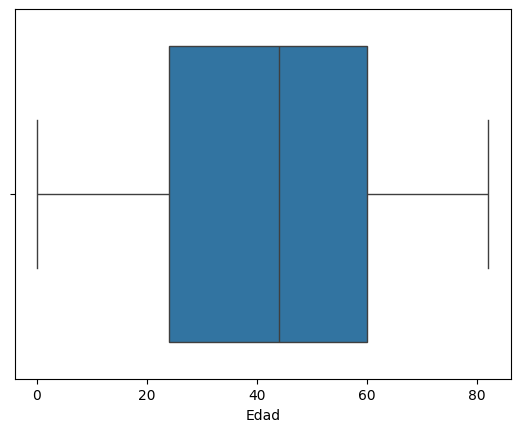

In [ ]:
#Diagrama de Caja
sns.boxplot(data=df,x=Variables[0])
plt.show()

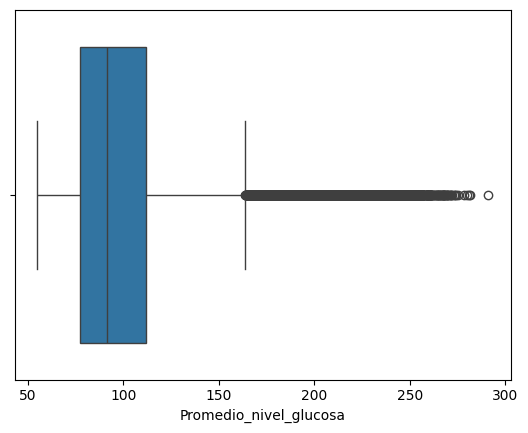

In [ ]:
#Diagrama de Caja
sns.boxplot(data=df,x=Variables[1])
plt.show()

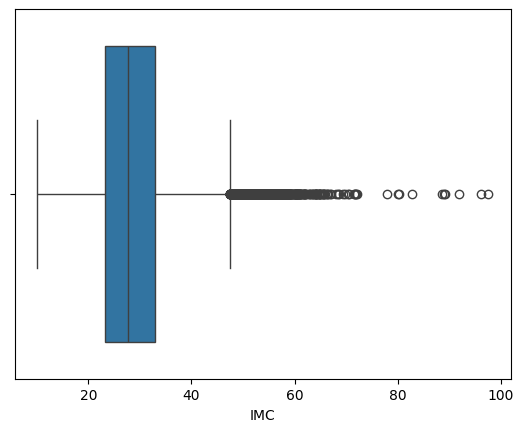

In [ ]:
#Diagrama de Caja
sns.boxplot(data=df,x=Variables[2])
plt.show()

## 5.1.1. Analisis de Outliers

In [ ]:
#Funcion que redue los outliers de extremos
def outlier_capping(x, q):
    x = x.clip(upper=x.quantile(q))
    return(x)

In [ ]:
df[Variables[1]].describe()

,Promedio_nivel_glucosa
count,43400.000000
mean,104.482750
std,43.111751
min,55.000000
25%,77.540000
50%,91.580000
75%,112.070000
max,291.050000


In [ ]:
df[Variables[1]].quantile(np.arange(0,1,0.1))

,Promedio_nivel_glucosa
0.0,55.000
0.1,66.180
0.2,74.350
0.3,80.370
0.4,85.626
0.5,91.580
0.6,98.240
0.7,106.370
0.8,120.290
0.9,180.952


In [ ]:
df[Variables[1]].quantile(np.arange(0.9,1,0.01))

,Promedio_nivel_glucosa
0.90,180.9520
0.91,189.0600
0.92,196.0824
0.93,201.5800
0.94,207.1200
0.95,212.0415
0.96,216.8800
0.97,222.6903
0.98,229.3810
0.99,239.1902


1. Insight 21: el valor maximo de la variable Promedio_nivel_glucosa alcanza el 291, mientras que en el perentil 0.99 el valor alcanza un 238. Se hara tratamiento eliminando ese valor maximo.

In [ ]:
q=0.99
df_tratamiento = df[[Variables[1]]].apply(lambda x: outlier_capping(x, q))

In [ ]:
df = pd.concat([df.drop(columns = [Variables[1]]),df_tratamiento],axis = 1)

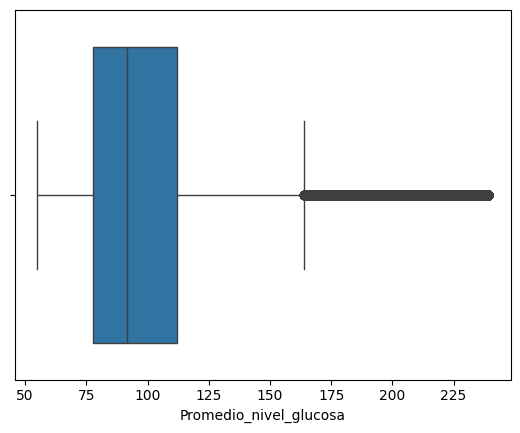

In [ ]:
#Diagrama de Caja
sns.boxplot(data=df,x=Variables[1])
plt.show()

In [ ]:
df[Variables[2]].describe()

,IMC
count,41938.000000
mean,28.605038
std,7.770020
min,10.100000
25%,23.200000
50%,27.700000
75%,32.900000
max,97.600000


In [ ]:
df[Variables[2]].quantile(np.arange(0,1,0.1))

,IMC
0.0,10.1
0.1,19.4
0.2,22.2
0.3,24.2
0.4,26.0
0.5,27.7
0.6,29.6
0.7,31.6
0.8,34.3
0.9,38.6


In [ ]:
df[Variables[2]].quantile(np.arange(0.9,1,0.01))

,IMC
0.90,38.6
0.91,39.2
0.92,39.9
0.93,40.6
0.94,41.6
0.95,42.6
0.96,43.8
0.97,45.5
0.98,47.8
0.99,51.8


1. Insight 22: el valor maximo de la variable IMC alcanza el 97.6, mientras que en el perentil 0.99 el valor alcanza un 51.8. Se hara tratamiento eliminando ese valor maximo.

In [ ]:
q=0.99
df_tratamiento2 = df[[Variables[2]]].apply(lambda x: outlier_capping(x, q))

In [ ]:
df = pd.concat([df.drop(columns = [Variables[2]]),df_tratamiento2],axis = 1)

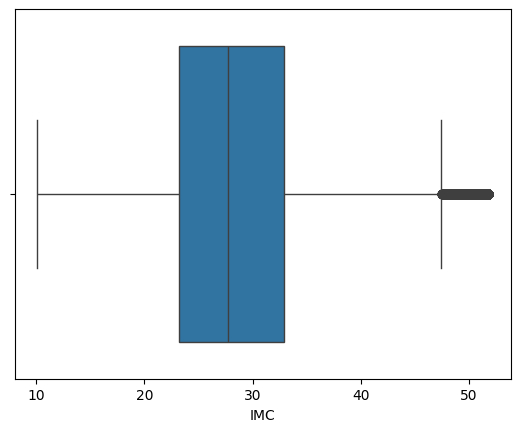

In [ ]:
#Diagrama de Caja
sns.boxplot(data=df,x=Variables[2])
plt.show()

## 5.2. Imputación de Nulos.

### 5.2.1. Analisis de Nulos

In [ ]:
df['IMC'].describe()

,IMC
count,41938.000000
mean,28.548545
std,7.551230
min,10.100000
25%,23.200000
50%,27.700000
75%,32.900000
max,51.800000


In [ ]:
df['IMC'] = df['IMC'].fillna(27.7)

In [ ]:
df['IMC'].describe()

,IMC
count,43400.000000
mean,28.519961
std,7.424529
min,10.100000
25%,23.400000
50%,27.700000
75%,32.600000
max,51.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Genero                  43400 non-null  object 
 1   Edad                    43400 non-null  float64
 2   Flag_hipertension       43400 non-null  int64  
 3   Flag_problem_cardiaco   43400 non-null  int64  
 4   Estados_civil           43400 non-null  object 
 5   Tipo_trabajo            43400 non-null  object 
 6   Zona_residencia         43400 non-null  object 
 7   Flag_fumador            43400 non-null  object 
 8   Ataque_cardiaco         43400 non-null  int64  
 9   Promedio_nivel_glucosa  43400 non-null  float64
 10  IMC                     43400 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 3.6+ MB


In [ ]:
df.dropna()

,Genero,Edad,Flag_hipertension,Flag_problem_cardiaco,Estados_civil,Tipo_trabajo,Zona_residencia,Flag_fumador,Ataque_cardiaco,Promedio_nivel_glucosa,IMC
0,Hombre,3.0,0,0,No,cuidar_ninos,Rural,sin_datos,0,95.12,18.0
1,Hombre,58.0,1,0,Si,Empresa_privada,Urbano,Nunca_fuma,0,87.96,39.2
2,Mujer,8.0,0,0,No,Empresa_privada,Urbano,sin_datos,0,110.89,17.6
3,Mujer,70.0,0,0,Si,Empresa_privada,Rural,antes_fumaba,0,69.04,35.9
4,Hombre,14.0,0,0,No,Nunca_trabajo,Rural,sin_datos,0,161.28,19.1
...,...,...,...,...,...,...,...,...,...,...,...
43395,Mujer,10.0,0,0,No,cuidar_ninos,Urbano,Nunca_fuma,0,58.64,20.4
43396,Mujer,56.0,0,0,Si,En_gobierno,Urbano,antes_fumaba,0,213.61,51.8
43397,Mujer,82.0,1,0,Si,Empresa_privada,Urbano,antes_fumaba,0,91.94,28.9
43398,Hombre,40.0,0,0,Si,Empresa_privada,Urbano,Nunca_fuma,0,99.16,33.2


## 5.3 Recategorizar las variables categoricas

In [ ]:
df.head(5)

,Genero,Edad,Flag_hipertension,Flag_problem_cardiaco,Estados_civil,Tipo_trabajo,Zona_residencia,Flag_fumador,Ataque_cardiaco,Promedio_nivel_glucosa,IMC
0,Hombre,3.0,0,0,No,cuidar_ninos,Rural,sin_datos,0,95.12,18.0
1,Hombre,58.0,1,0,Si,Empresa_privada,Urbano,Nunca_fuma,0,87.96,39.2
2,Mujer,8.0,0,0,No,Empresa_privada,Urbano,sin_datos,0,110.89,17.6
3,Mujer,70.0,0,0,Si,Empresa_privada,Rural,antes_fumaba,0,69.04,35.9
4,Hombre,14.0,0,0,No,Nunca_trabajo,Rural,sin_datos,0,161.28,19.1


In [ ]:
df['GeneroEncoded'] = df['Genero'].map( {'Hombre': 1, 'Mujer': 2, 'Other': 3} ).astype(int)

In [ ]:
df['Estados_civilEncoded'] = df['Estados_civil'].map( {'Si': 1, 'No': 0} ).astype(int)

In [ ]:
df['Tipo_trabajoEncoded'] = df['Tipo_trabajo'].map( {'Nunca_trabajo': 1, 'Emprendedor': 2, 'Empresa_privada': 3, 'En_gobierno': 4, 'cuidar_ninos': 5} ).astype(int)

In [ ]:
df['Zona_residenciaEncoded'] = df['Zona_residencia'].map( {'Rural': 1, 'Urbano': 2} ).astype(int)

In [ ]:
df['Flag_fumadorEncoded'] = df['Flag_fumador'].map( {'sin_datos': 1, 'Nunca_fuma': 2, 'antes_fumaba': 3, 'fumador': 4} ).astype(int)

In [ ]:
df.columns

Index(['Genero', 'Edad', 'Flag_hipertension', 'Flag_problem_cardiaco',
       'Estados_civil', 'Tipo_trabajo', 'Zona_residencia', 'Flag_fumador',
       'Ataque_cardiaco', 'Promedio_nivel_glucosa', 'IMC', 'GeneroEncoded',
       'Estados_civilEncoded', 'Tipo_trabajoEncoded', 'Zona_residenciaEncoded',
       'Flag_fumadorEncoded'],
      dtype='object')

In [ ]:
drop_elements = ['Genero','Estados_civil','Tipo_trabajo','Zona_residencia','Flag_fumador']
df_encoded = df.drop(drop_elements, axis = 1)

In [ ]:
df_encoded.head(3)

,Edad,Flag_hipertension,Flag_problem_cardiaco,Ataque_cardiaco,Promedio_nivel_glucosa,IMC,GeneroEncoded,Estados_civilEncoded,Tipo_trabajoEncoded,Zona_residenciaEncoded,Flag_fumadorEncoded
0,3.0,0,0,0,95.12,18.0,1,0,5,1,1
1,58.0,1,0,0,87.96,39.2,1,1,3,2,2
2,8.0,0,0,0,110.89,17.6,2,0,3,2,1


## 5.4. Imputar Valores Numericos invalidos.

Bajo la premisa que una persona mayor de 18 años puede trabajar.

In [ ]:
df.loc[ df['Edad'] <= 18, 'Edad'] = 18

## 5.5. Seleccionar Variables mas Importantes

<Axes: >

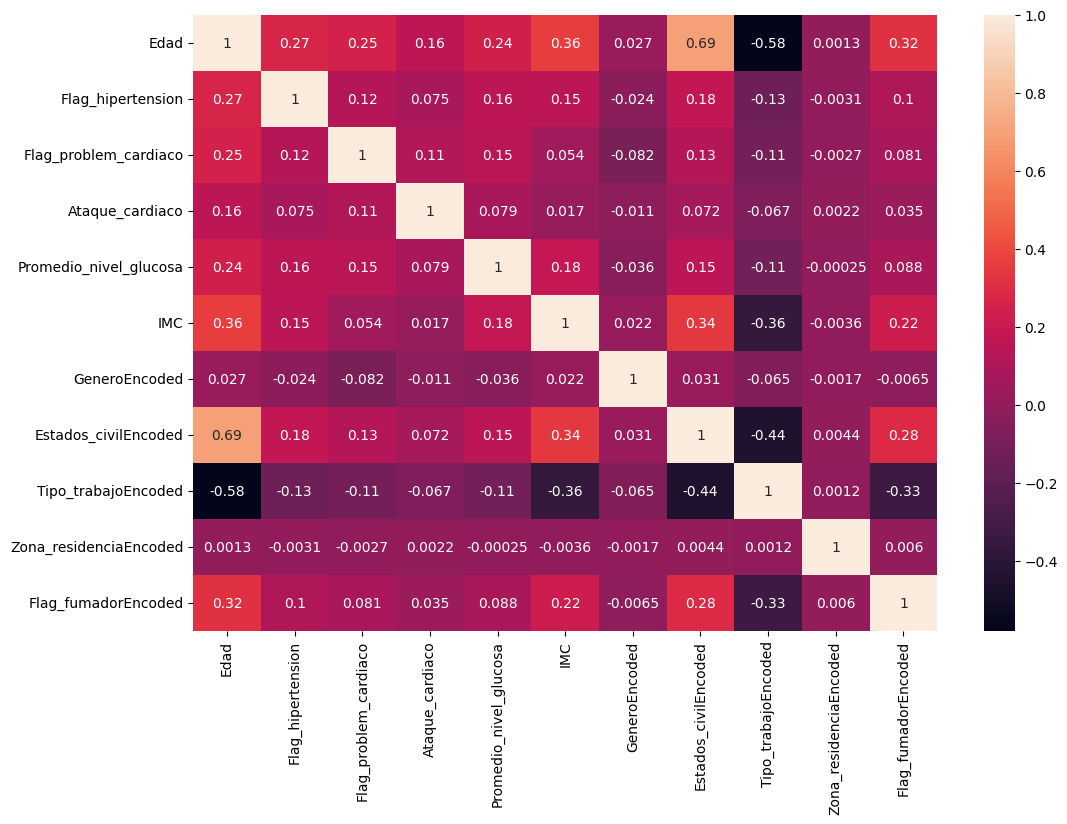

In [ ]:
#Calculamos la correlación variables numéricas
corr = df_encoded.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True)

In [ ]:
from sklearn.feature_selection import SelectKBest

#Variables independientes
X=df_encoded.drop(['Ataque_cardiaco'], axis=1)
#Variable dependiente (Target)
y=df_encoded['Ataque_cardiaco']

size=4

best=SelectKBest(k=size) #Coloca la cantidad de variables a tomar en cuenta
X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Edad', 'Flag_hipertension', 'Flag_problem_cardiaco',
       'Promedio_nivel_glucosa'],
      dtype='object')


In [ ]:
best_variables = X.columns[selected]

# 6. Balanceo de Datos

## 6.1. Analisis de distribucion de variable target

In [ ]:
df_encoded.groupby("Ataque_cardiaco").size()

,0
Ataque_cardiaco,
0,42617
1,783


Clase 0 Sin Ataques Cardiacos:  42617
Clase 1 Ataques Cardiacos:  783
proporción:  54.43 : 1


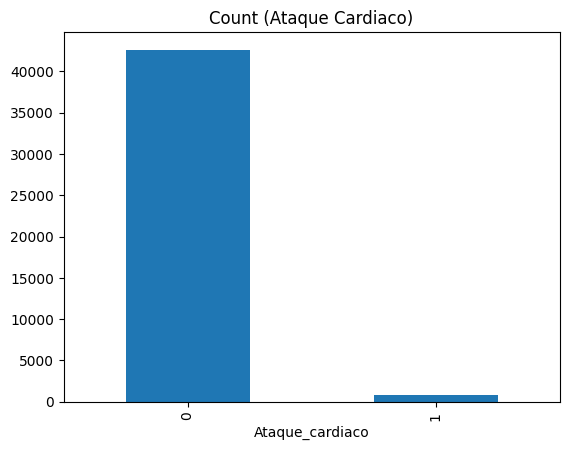

In [ ]:
target_count = df_encoded.Ataque_cardiaco.value_counts()
print("Clase 0 Sin Ataques Cardiacos: ", target_count[0])
print("Clase 1 Ataques Cardiacos: ", target_count[1])
print("proporción: ", round(target_count[0]/target_count[1], 2), ": 1")
target_count.plot(kind="bar", title = "Count (Ataque Cardiaco)");

1. Insight 23: Tenemos un serio desbalance de datos, por lo cual se realizaran dos balanceos para determinar el mejor comportamiento.

## 6.2. Division de sets

In [ ]:
#Separacion del Train y Test para cada bloque de datos
x = df_encoded[best_variables]
y = df_encoded['Ataque_cardiaco'] #TARGET

import sklearn.model_selection as model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.70, random_state=1200)

In [ ]:
#Unificamos nuestros datos de entrenamiento
df_train = pd.concat([x_train,y_train],axis=1)

In [ ]:
df_train.head(3)

,Edad,Flag_hipertension,Flag_problem_cardiaco,Promedio_nivel_glucosa,Ataque_cardiaco
3883,28.0,0,0,98.05,0
3359,35.0,0,0,87.72,0
33102,58.0,0,0,83.06,0


In [ ]:
#dividimos las clases para el entrenamiento
count_class_0, count_class_1 = df_train.Ataque_cardiaco.value_counts()
df_class_0 = df_train[df_train['Ataque_cardiaco'] == 0]
df_class_1 = df_train[df_train['Ataque_cardiaco'] == 1]

In [ ]:
count_class_0, len(df_class_0), count_class_1, len(df_class_1)

(29820, 29820, 559, 559)

## 6.3. Oversampling

In [ ]:
#Ejemplo
aux = df_class_0.head(2)
aux.sample(7,replace=True)

,Edad,Flag_hipertension,Flag_problem_cardiaco,Promedio_nivel_glucosa,Ataque_cardiaco
3359,35.0,0,0,87.72,0
3883,28.0,0,0,98.05,0
3359,35.0,0,0,87.72,0
3883,28.0,0,0,98.05,0
3359,35.0,0,0,87.72,0
3883,28.0,0,0,98.05,0
3883,28.0,0,0,98.05,0


Random over-sampling:
Ataque_cardiaco
0    29820
1    29820
Name: count, dtype: int64


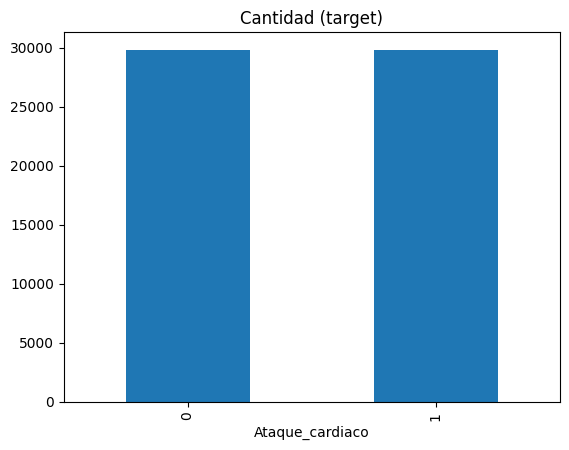

In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_train_over.Ataque_cardiaco.value_counts())

df_train_over.Ataque_cardiaco.value_counts().plot(kind='bar', title='Cantidad (target)');

In [ ]:
df_train.Ataque_cardiaco.value_counts()

,count
Ataque_cardiaco,
0,29820
1,559


In [ ]:
df_train_over.Ataque_cardiaco.value_counts()

,count
Ataque_cardiaco,
0,29820
1,29820


## 6.4. Undersampling

In [ ]:
#Ejemplo
aux = df_class_1.head(2)
aux.sample(7,replace=True)

,Edad,Flag_hipertension,Flag_problem_cardiaco,Promedio_nivel_glucosa,Ataque_cardiaco
34870,65.0,0,0,220.98,1
34870,65.0,0,0,220.98,1
20173,57.0,0,0,177.73,1
20173,57.0,0,0,177.73,1
20173,57.0,0,0,177.73,1
20173,57.0,0,0,177.73,1
34870,65.0,0,0,220.98,1


Estrategia de Muestreo under-sampling:
Ataque_cardiaco
0    559
1    559
Name: count, dtype: int64


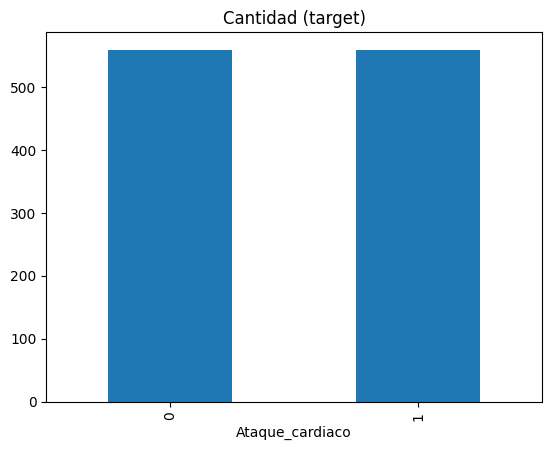

In [ ]:
#este es la estrategia de undersampling para balancear la cantidad de 0 a la cantidad de 1
df_class_0_under = df_class_0.sample(count_class_1,random_state=1200)

df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)


print('Estrategia de Muestreo under-sampling:')
print(df_train_under.Ataque_cardiaco.value_counts())

df_train_under.Ataque_cardiaco.value_counts().plot(kind='bar', title='Cantidad (target)');

# 7. Modelado

## 7.1. Arbol de Decision

### 7.1.1. Datos Originales

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, log_loss

#Declarando el modelo
model = DecisionTreeClassifier()
#Entrenando el modelo
model.fit(x_train, y_train)
#Generando la predicción
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy DATOS ORIGINALES: %.2f%%" % (accuracy * 100.0))


ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy DATOS ORIGINALES: 96.53%
Log Loss: 1.2511889510698837


In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión - DATOS ORIGINALES:\n', conf_mat)

Matriz de Confusión - DATOS ORIGINALES:
 [[12556   241]
 [  211    13]]


Métricas de Matriz de Confusión - DATOS ORIGINALES:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     12797
           1       0.05      0.06      0.05       224

    accuracy                           0.97     13021
   macro avg       0.52      0.52      0.52     13021
weighted avg       0.97      0.97      0.97     13021



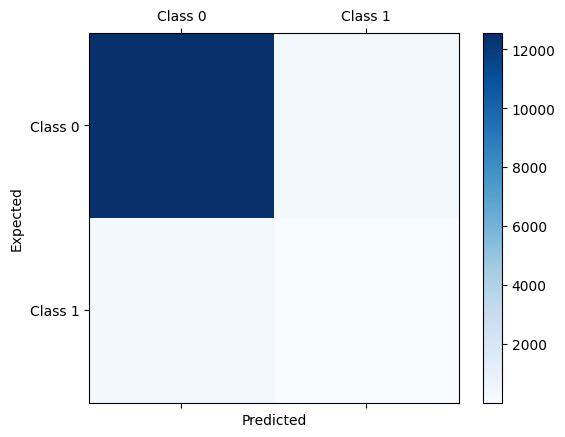

In [ ]:
from sklearn.metrics import classification_report
print('Métricas de Matriz de Confusión - DATOS ORIGINALES:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### 7.1.2. Oversampling

In [ ]:
model = DecisionTreeClassifier()

x_train_o= df_train_over[best_variables]
y_train_o = df_train_over[['Ataque_cardiaco']]

model.fit(x_train_o, y_train_o)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy OVERSAMPLING: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy OVERSAMPLING: 96.49%
Log Loss: 1.2650295368118072


In [ ]:
# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión OVERSAMPLING:\n', conf_mat)

Matriz de Confusión OVERSAMPLING:
 [[12549   248]
 [  209    15]]


Métricas de Matriz de Confusión - OVERSAMPLING:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     12797
           1       0.06      0.07      0.06       224

    accuracy                           0.96     13021
   macro avg       0.52      0.52      0.52     13021
weighted avg       0.97      0.96      0.97     13021



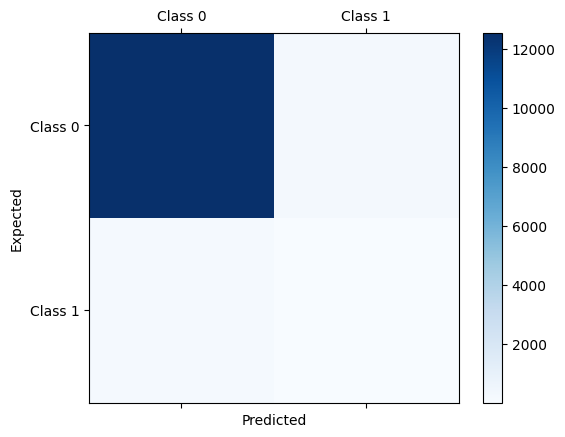

In [ ]:
print('Métricas de Matriz de Confusión - OVERSAMPLING:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### 7.1.3. Undersampling

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

x_train_u= df_train_under[best_variables]
y_train_u = df_train_under[['Ataque_cardiaco']]

model.fit(x_train_u, y_train_u)
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy UNDERSAMPLING: %.2f%%" % (accuracy * 100.0))
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Accuracy UNDERSAMPLING: 68.33%
Log Loss: 11.415715119938493


In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión UNDERSAMPLING:\n', conf_mat)

Matriz de Confusión UNDERSAMPLING:
 [[8747 4050]
 [  74  150]]


Métricas de Matriz de Confusión - UNDERSAMPLING:
               precision    recall  f1-score   support

           0       0.99      0.68      0.81     12797
           1       0.04      0.67      0.07       224

    accuracy                           0.68     13021
   macro avg       0.51      0.68      0.44     13021
weighted avg       0.98      0.68      0.80     13021



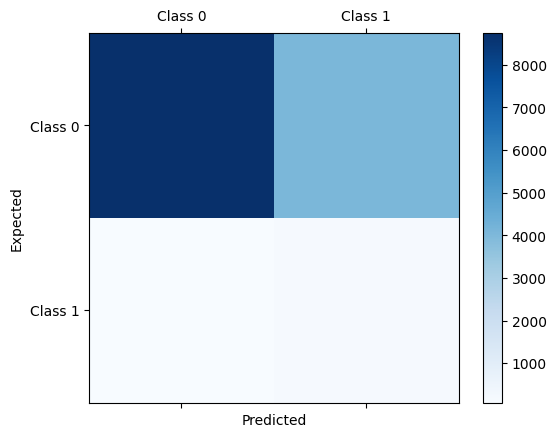

In [ ]:
print('Métricas de Matriz de Confusión - UNDERSAMPLING:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

1. Insight 23: El enfoque del modelo se centara en personas que han sufrido ataques cardiacos basados en tres variables:
  *   Edad
  *   Flag_hipertension
  *   Flag_problem_cardiaco
  *   Promedio_nivel_glucosa
  
2. Insight 24: Utilizando el set de datos original, se obtuvieron los siguientes resultados:
  *   DATOS ORIGINALES:
    * Accuracy: 96.53%
    * Precision: 5%
    * Recall: 6%
  *   OVERSAMPLING:
    * Accuracy: 96.49%
    * Precision: 6%
    * Recall: 7%
  *   UNDERSAMPLING:
    * Accuracy: 68.33%
    * Precision: 4%
    * Recall: 67%

3. Insight 25: Analizando tres sets (normal, oversampling y undersampling) se determino que el mejor set es el del Undersampling bajo la premisa de que se capturan una mayor cantidad de pacientes con riesgos de ataque cardiaco.



## 7.2. Random Forest.

In [ ]:
#Importar (declarar) el algoritmo
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#Definir Modelo predefinido
modelRFD = RandomForestClassifier()

In [ ]:
#Definir Modelo personalizado
modelRFT = RandomForestClassifier(n_estimators=20, max_depth=8)

In [ ]:
#Entrenar Modelo RFD
modelRFD.fit(x_train_u, y_train_u)

RandomForestClassifier()

In [ ]:
#Entrenar Modelo RFT
modelRFT.fit(x_train_u, y_train_u)

RandomForestClassifier(max_depth=8, n_estimators=20)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
pred1 = modelRFD.predict(x_test)
pred2 = modelRFT.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred1)

array([[9164, 3633],
       [  60,  164]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred2)

array([[9205, 3592],
       [  50,  174]])

In [ ]:
cr1 = classification_report(y_test,pred1, output_dict=True)
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.99      0.72      0.83     12797
           1       0.04      0.73      0.08       224

    accuracy                           0.72     13021
   macro avg       0.52      0.72      0.46     13021
weighted avg       0.98      0.72      0.82     13021



In [ ]:
cr2 = classification_report(y_test,pred2, output_dict=True)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.99      0.72      0.83     12797
           1       0.05      0.78      0.09       224

    accuracy                           0.72     13021
   macro avg       0.52      0.75      0.46     13021
weighted avg       0.98      0.72      0.82     13021



## 7.3. XGBoost.

In [ ]:
!pip install xgboost

In [ ]:
#Importar (declarar) el algoritmo
import xgboost as xgb

In [ ]:
#Definir Modelo XGBoost Predeterminado
modelXGBD = xgb.XGBClassifier()

In [ ]:
#Definir Modelo XGBoost Personalizado
modelXGBP = xgb.XGBClassifier(n_estimators=20 , max_depth=8, learning_rate=0.1 , subsample=0.5)

In [ ]:
#Entrenar Modelo XGBD
modelXGBD.fit(x_train_u, y_train_u)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Entrenar Modelo XGBP
modelXGBP.fit(x_train_u, y_train_u)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=20, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
pred3 = modelXGBD.predict(x_test)
pred4 = modelXGBP.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred3)

array([[9051, 3746],
       [  55,  169]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred4)

array([[9145, 3652],
       [  54,  170]])

In [ ]:
cr3 = classification_report(y_test,pred3, output_dict=True)
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.99      0.71      0.83     12797
           1       0.04      0.75      0.08       224

    accuracy                           0.71     13021
   macro avg       0.52      0.73      0.45     13021
weighted avg       0.98      0.71      0.81     13021



In [ ]:
cr4 = classification_report(y_test,pred4, output_dict=True)
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.99      0.71      0.83     12797
           1       0.04      0.76      0.08       224

    accuracy                           0.72     13021
   macro avg       0.52      0.74      0.46     13021
weighted avg       0.98      0.72      0.82     13021



## 7.4. Catboost

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.3 MB/s eta 0:00:00


In [ ]:
import catboost
from catboost import CatBoostClassifier

In [ ]:
#Definir Modelo CBD
modelCBD = CatBoostClassifier()

In [ ]:
#Definir Modelo CBP
modelCBP = CatBoostClassifier(iterations=2000, depth=8, learning_rate=0.1)

In [ ]:
#Entrenar Modelo CBD
modelCBD.fit(x_train_u, y_train_u)

Learning rate set to 0.010805
0:	learn: 0.6888623	total: 48.8ms	remaining: 48.7s
1:	learn: 0.6841285	total: 51.2ms	remaining: 25.5s
2:	learn: 0.6785244	total: 52.4ms	remaining: 17.4s
3:	learn: 0.6731685	total: 59.6ms	remaining: 14.8s
4:	learn: 0.6691136	total: 65.7ms	remaining: 13.1s
5:	learn: 0.6643343	total: 67ms	remaining: 11.1s
6:	learn: 0.6588804	total: 68.4ms	remaining: 9.7s
7:	learn: 0.6548656	total: 69.9ms	remaining: 8.66s
8:	learn: 0.6501952	total: 75.8ms	remaining: 8.35s
9:	learn: 0.6451951	total: 77.1ms	remaining: 7.63s
10:	learn: 0.6408434	total: 78.4ms	remaining: 7.05s
11:	learn: 0.6371733	total: 82.9ms	remaining: 6.82s
12:	learn: 0.6342484	total: 85.2ms	remaining: 6.47s
13:	learn: 0.6295837	total: 86.9ms	remaining: 6.12s
14:	learn: 0.6262045	total: 89.3ms	remaining: 5.86s
15:	learn: 0.6212617	total: 91.6ms	remaining: 5.63s
16:	learn: 0.6178896	total: 94.3ms	remaining: 5.45s
17:	learn: 0.6143474	total: 109ms	remaining: 5.94s
18:	learn: 0.6111522	total: 113ms	remaining: 5.8

In [ ]:
#Entrenar Modelo CBP
modelCBP.fit(x_train_u, y_train_u)

0:	learn: 0.6557224	total: 2.64ms	remaining: 5.27s
1:	learn: 0.6141038	total: 8.41ms	remaining: 8.4s
2:	learn: 0.5859115	total: 9.34ms	remaining: 6.21s
3:	learn: 0.5626984	total: 18.7ms	remaining: 9.34s
4:	learn: 0.5425767	total: 25.9ms	remaining: 10.3s
5:	learn: 0.5233837	total: 28.6ms	remaining: 9.51s
6:	learn: 0.5064202	total: 35.9ms	remaining: 10.2s
7:	learn: 0.4944755	total: 42.1ms	remaining: 10.5s
8:	learn: 0.4890229	total: 43.2ms	remaining: 9.55s
9:	learn: 0.4812025	total: 47.8ms	remaining: 9.5s
10:	learn: 0.4738740	total: 49.6ms	remaining: 8.98s
11:	learn: 0.4674146	total: 55.9ms	remaining: 9.26s
12:	learn: 0.4626125	total: 59.5ms	remaining: 9.09s
13:	learn: 0.4587434	total: 62.2ms	remaining: 8.83s
14:	learn: 0.4541017	total: 68.9ms	remaining: 9.12s
15:	learn: 0.4520977	total: 73.8ms	remaining: 9.15s
16:	learn: 0.4489900	total: 76.5ms	remaining: 8.92s
17:	learn: 0.4447917	total: 82.4ms	remaining: 9.07s
18:	learn: 0.4429963	total: 87.5ms	remaining: 9.12s
19:	learn: 0.4398845	tot

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
pred5 = modelCBD.predict(x_test)
pred6 = modelCBP.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred5)

array([[9338, 3459],
       [  48,  176]])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred6)

array([[9176, 3621],
       [  64,  160]])

In [ ]:
cr5 = classification_report(y_test,pred5, output_dict=True)
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

           0       0.99      0.73      0.84     12797
           1       0.05      0.79      0.09       224

    accuracy                           0.73     13021
   macro avg       0.52      0.76      0.47     13021
weighted avg       0.98      0.73      0.83     13021



In [ ]:
cr6 = classification_report(y_test,pred6, output_dict=True)
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

           0       0.99      0.72      0.83     12797
           1       0.04      0.71      0.08       224

    accuracy                           0.72     13021
   macro avg       0.52      0.72      0.46     13021
weighted avg       0.98      0.72      0.82     13021



## 7.5. Evaluacion de Modelos.

In [ ]:
#Let's use accuracy score
from sklearn.metrics import accuracy_score

acc1 = accuracy_score(y_test, pred1)
acc2 = accuracy_score(y_test, pred2)
acc3 = accuracy_score(y_test, pred3)
acc4 = accuracy_score(y_test, pred4)
acc5 = accuracy_score(y_test, pred5)
acc6 = accuracy_score(y_test, pred6)

print("Accuracy for RFD: %.2f" % (acc1 * 100))
print("Accuracy for RFT: %.2f" % (acc2 * 100))
print("Accuracy for XGBD: %.2f" % (acc3 * 100))
print("Accuracy for XGBT: %.2f" % (acc4 * 100))
print("Accuracy for CBD: %.2f" % (acc5 * 100))
print("Accuracy for CBT: %.2f" % (acc6 * 100))

Accuracy for RFD: 71.64
Accuracy for RFT: 72.03
Accuracy for XGBD: 70.81
Accuracy for XGBT: 71.54
Accuracy for CBD: 73.07
Accuracy for CBT: 71.70


In [ ]:
df_eval = pd.DataFrame({'algorithm' : ['RFD','RFT','XGBD','XGBT','CBD','CBT'],
                   'precision' : [cr1['1']['precision'],cr2['1']['precision'],cr3['1']['precision'],cr4['1']['precision'],cr5['1']['precision'],cr6['1']['precision']],
                   'recall' : [cr1['1']['recall'],cr2['1']['recall'],cr3['1']['recall'],cr4['1']['recall'],cr5['1']['recall'],cr6['1']['recall']],
                   'F1 Score' : [cr1['1']['f1-score'],cr2['1']['f1-score'],cr3['1']['f1-score'],cr4['1']['f1-score'],cr5['1']['f1-score'],cr6['1']['f1-score']],
                   'Accuracy' : [acc1,acc2,acc3,acc4,acc5,acc6]})

In [ ]:
df_eval

,algorithm,precision,recall,F1 Score,Accuracy
0,RFD,0.043192,0.732143,0.081572,0.716381
1,RFT,0.046203,0.776786,0.087218,0.720298
2,XGBD,0.043167,0.754464,0.081662,0.708087
3,XGBT,0.044479,0.758929,0.084034,0.715383
4,CBD,0.048418,0.785714,0.091215,0.730666
5,CBT,0.042317,0.714286,0.079900,0.716996


Matriz de Confusión MODELO GANADOR:
 [[9338 3459]
 [  48  176]]
Métricas de Matriz de Confusión - MODELO GANADOR:
               precision    recall  f1-score   support

           0       0.99      0.73      0.84     12797
           1       0.05      0.79      0.09       224

    accuracy                           0.73     13021
   macro avg       0.52      0.76      0.47     13021
weighted avg       0.98      0.73      0.83     13021



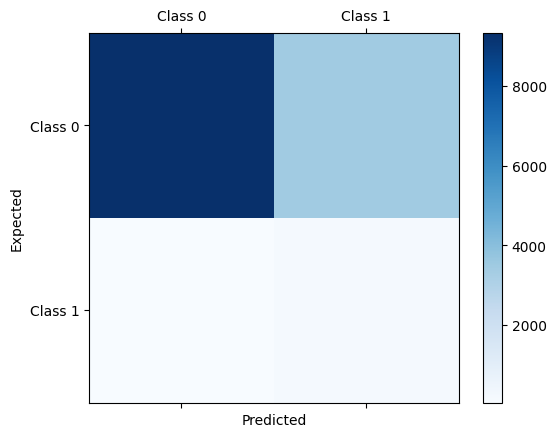

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

# EVLUANDO LA MATRIZ DE CONFUSION
#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=pred5) ##Modificar al modelo
#--------------------------------------------------------------------

print('Matriz de Confusión MODELO GANADOR:\n', conf_mat)

print('Métricas de Matriz de Confusión - MODELO GANADOR:\n',classification_report(y_test,pred5))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

# 8. Conclusiones

*   El modelo elegido fue el Catboost con parametros por default (CBD), el cual nos ha entregado un mayor recall a pesar de tener una baja precision.
*   **Recall superior**: El modelo CBD tiene el recall más alto (78.5%) de todos los modelos probados, lo que significa que es el que mejor identifica a los pacientes que realmente tienen un riesgo de ataque cardiaco. En un escenario de salud, donde la prioridad es identificar correctamente a los pacientes en riesgo, un alto recall es esencial, ya que minimiza el riesgo de que un paciente con un ataque cardiaco sea clasificado erróneamente como no en riesgo. Esto es crítico para prevenir posibles eventos fatales.
*   **Enfoque en la detección temprana**: El objetivo de un modelo de predicción en el ámbito médico es identificar a los pacientes en riesgo de forma temprana para implementar intervenciones preventivas. Un modelo con un alto recall, como el CBD, asegura que muchos de estos pacientes sean detectados, incluso si eso significa tener una mayor cantidad de falsos positivos. Si bien un falso positivo puede llevar a tratamientos adicionales o más pruebas, el costo de no identificar a un paciente en riesgo es mucho más alto (puede tener consecuencias graves para la salud del paciente). Por lo tanto, el modelo está alineado con la filosofía de priorizar la detección temprana sobre la precisión perfecta.
*   **Desbalance de clases y estrategia de undersampling**: Dado que el conjunto de datos está desbalanceado (es decir, los pacientes sin ataque cardiaco son mucho menos numerosos que los que no lo tienen), el undersampling ha permitido mejorar el rendimiento en la identificación de la clase minoritaria (pacientes con ataque cardiaco). El modelo CBD, después de aplicar esta técnica, logra un buen desempeño a pesar de los desafíos inherentes a la desventaja de clases desbalanceadas. Esto muestra la capacidad del modelo para adaptarse a contextos desafiantes.
*   **F1 Score y balance entre precisión y recall**: Aunque el F1 Score no es el más alto entre los modelos, su valor (0.0912) sigue siendo razonablemente bueno, especialmente cuando se considera que el recall es tan alto. Este equilibrio entre precisión y recall es fundamental, ya que permite al modelo capturar correctamente muchos pacientes en riesgo sin sacrificar completamente la precisión.
*   **Aplicación en la práctica clínica**: En el contexto clínico, un modelo con un alto recall es particularmente valioso. Detectar a los pacientes en riesgo de manera anticipada tiene un impacto directo en la toma de decisiones médicas y en la prevención. Un modelo que permita actuar sobre más pacientes con mayor probabilidad de tener un ataque cardiaco, incluso si algunos resultados son falsos positivos, ofrece una ventaja en cuanto a seguridad y prevención.